## Import Data from Kaggle
The reduced version of the MNIST dataset is already downloaded, divide into training and test set, and saved in the corresponding train and test folders.

To manually download the file is it possible to use Kaggle API command:
kaggle competitions download -c digit-recognizer
or download it from:
https://www.kaggle.com/competitions/digit-recognizer

In [1]:
import pandas as pd

data = pd.read_csv('train/train.csv').astype('float32')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
print('The Dataset is composed by', data.shape[0], 'grey-scale images of numbers from 0 to 9')
print('Each image is 28x28 pixels')

The Dataset is composed by 42000 grey-scale images of numbers from 0 to 9
Each image is 28x28 pixels


## Data Preprocessing

**Import Libraries**

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

**Divide Data into Pixels and Labels**

In [4]:
pixels = data.drop('label', axis=1)
labels = data['label']

**Plot of a Random Digit**

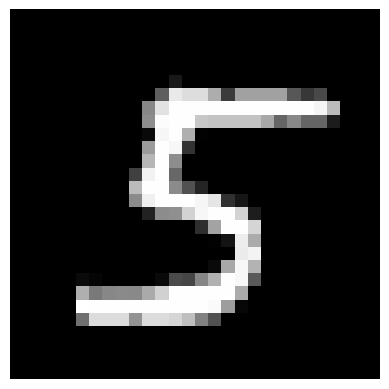

In [5]:
# Choose a Random Digits from the Dataset
image = pixels.sample(n=1).values

# Reshape the Image
image = image.reshape((28, 28))

# Plot the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

**Plot the Recurrencies for each Label**

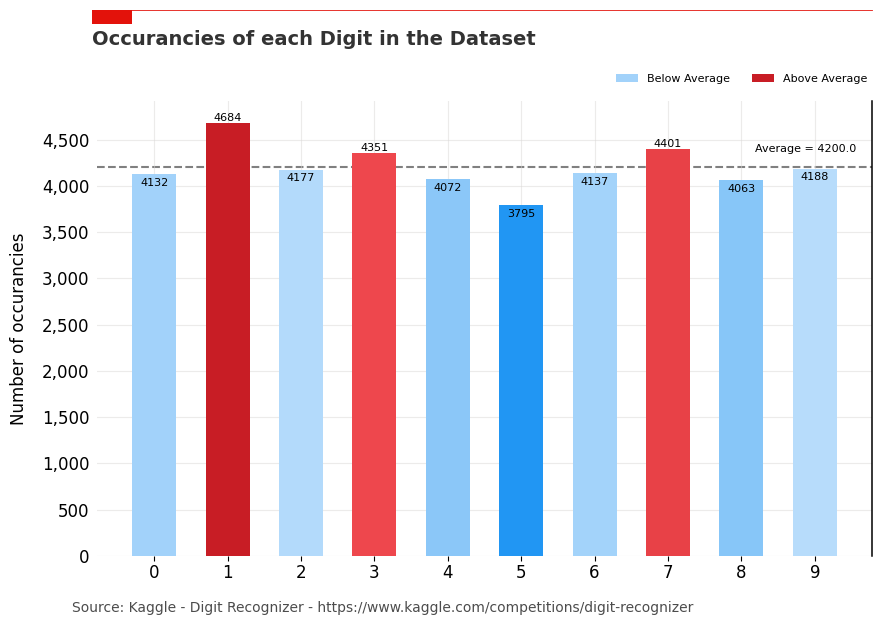

In [6]:
# Count how many occurancies there are for each label
count = Counter(labels)
occ = pd.DataFrame.from_dict(count, orient='index', columns=['Count'])
count_values = occ['Count'].values

# Plot the Barplot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
ax.set_xticks(occ.index) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Number of occurancies', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Occurancies of each Digit in the Dataset", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.12, s="Source: Kaggle - Digit Recognizer - https://www.kaggle.com/competitions/digit-recognizer", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(count_values), max(count_values)) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(occ.index, occ['Count'], color=cmap(norm(count_values)), width=0.6, zorder=2)

# Find the average data point and split the series in 2
average = occ['Count'].mean()
below_average = occ[occ['Count']<average]
above_average = occ[occ['Count']>=average]

# Colours - Choose the extreme colours of the colour map
colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below_average['Count'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(average, above_average['Count'].max())

# Plot bars and average (horizontal) line
bar1 = ax.bar(below_average.index, below_average['Count'], color=cmap_low(norm_low(below_average['Count'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax.bar(above_average.index , above_average['Count'], color=cmap_high(norm_high(above_average['Count'])), width=0.6, label='Above Average', zorder=2)
plt.axhline(y=average, linestyle='--', color = 'grey', linewidth=1.5, zorder=1)

# Determine the y-limits of the plot
ymin, ymax = ax.get_ylim()
# Calculate a suitable y position for the text label
y_pos = average/ymax + 0.03
# Annotate the average line
ax.text(0.98, y_pos, f'Average = {average}', ha='right', va='bottom', transform=ax.transAxes, size=8, zorder=3)

# Add label on top of each bar
ax.bar_label(bar1, labels=[e for e in below_average['Count']], padding=-10, color='black', fontsize=8)
ax.bar_label(bar2, labels=[e for e in above_average['Count']], padding=0, color='black', fontsize=8)

# Add legend
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)

**Prepare the Data for the Deep Learning Model**

In [7]:
# Devide Data into Train and Test Sets
x_train, x_test, y_train, y_test = train_test_split(pixels, labels, test_size = 0.2, random_state = 17)

# Reshape the Pixels Data
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28, 1))

# One-Hot Encoding for the Labels
y_train = to_categorical(y_train, dtype='int')
y_test = to_categorical(y_test, dtype='int')

print('Train Set has', x_train.shape[0], 'elements')
print('Test Set has', x_test.shape[0], 'elements')

Train Set has 33600 elements
Test Set has 8400 elements


**Import Libraries**

In [8]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

**Create the Model**

In [9]:
#Initialize the Model
model = tf.keras.Sequential()

# Input Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Hidden Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten Layer to convert the 2D features into 1D vector
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(64,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation ="softmax"))

**Train the Model**

In [10]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data = (x_test, y_test))

Epoch 1/8
1050/1050 [==============================] - 23s 20ms/step - loss: 0.5859 - accuracy: 0.8271 - val_loss: 0.0976 - val_accuracy: 0.9702
Epoch 2/8
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1414 - accuracy: 0.9586 - val_loss: 0.0701 - val_accuracy: 0.9798
Epoch 3/8
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0942 - accuracy: 0.9740 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 4/8
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0734 - accuracy: 0.9805 - val_loss: 0.0827 - val_accuracy: 0.9787
Epoch 5/8
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0617 - accuracy: 0.9826 - val_loss: 0.0577 - val_accuracy: 0.9850
Epoch 6/8
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0689 - val_accuracy: 0.9837
Epoch 7/8
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.0584 - val_ac

In [11]:
print("Validation Accuracy (on test set):", history.history['val_accuracy'])
print("Accuracy on train set:", history.history['accuracy'])
print("Validation Loss (on test set):", history.history['val_loss'])
print("Loss on train set :", history.history['loss'])

Validation Accuracy (on test set): [0.9702380895614624, 0.9797618985176086, 0.983214259147644, 0.978690505027771, 0.9850000143051147, 0.9836905002593994, 0.9854761958122253, 0.986547589302063]
Accuracy on train set: [0.8270833492279053, 0.958601176738739, 0.9739583134651184, 0.9805059432983398, 0.9826487898826599, 0.9842559695243835, 0.9857738018035889, 0.9877976179122925]
Validation Loss (on test set): [0.09760899841785431, 0.07005253434181213, 0.0602274090051651, 0.08270741999149323, 0.05766219273209572, 0.06892266124486923, 0.0583542063832283, 0.05113587528467178]
Loss on train set : [0.5858685374259949, 0.14141550660133362, 0.09420556575059891, 0.07338753342628479, 0.061678677797317505, 0.052513424307107925, 0.04952198639512062, 0.044756077229976654]


**Save or Load the Model (optional)**

In [12]:
# model.summary()
# model.save(r'model_hand.h5')

# from keras.models import load_model
# model = load_model('model_hand.h5')

**Plotting Learning Curves**

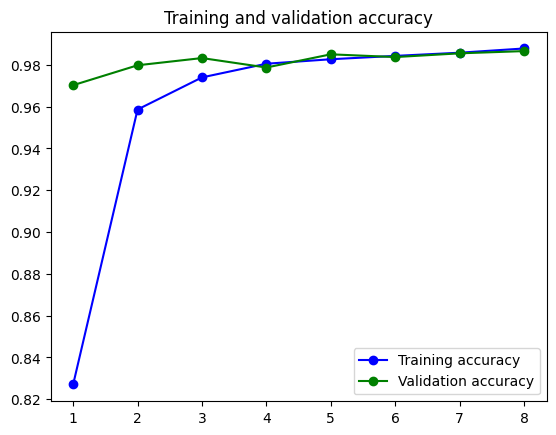

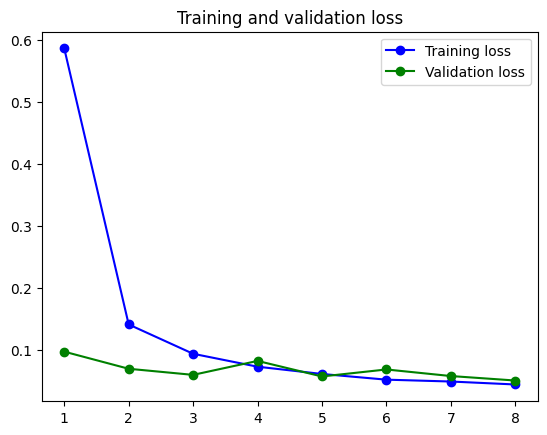

In [13]:
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'go-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Assuming 'history' is the output of your model's fit method:
plot_learning_curves(history)

**Plot the Confusion Matrix**

263/263 [==============================] - 2s 5ms/step


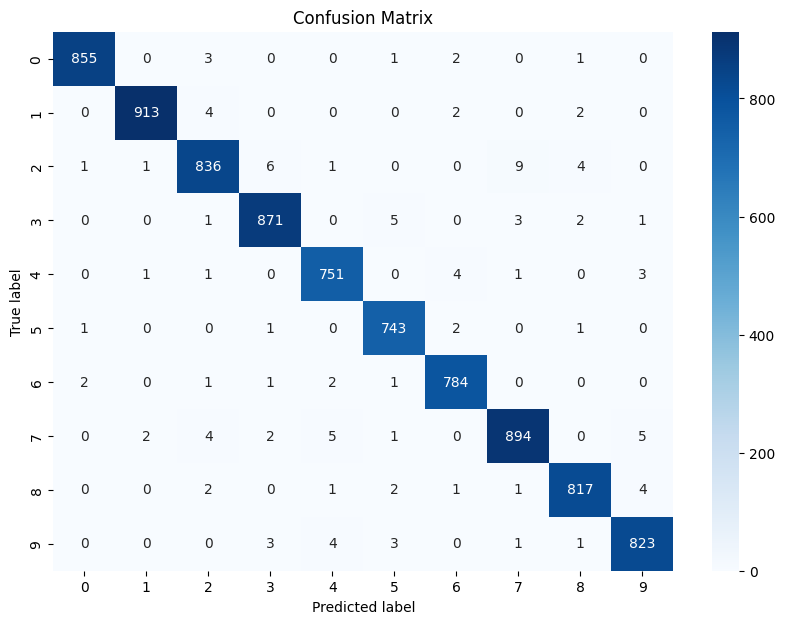

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_test_int_labels = np.argmax(y_test, axis=1)
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)
plot_confusion_matrix(y_test_int_labels, test_predictions, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Displaying Correct and Incorrect Predictions**

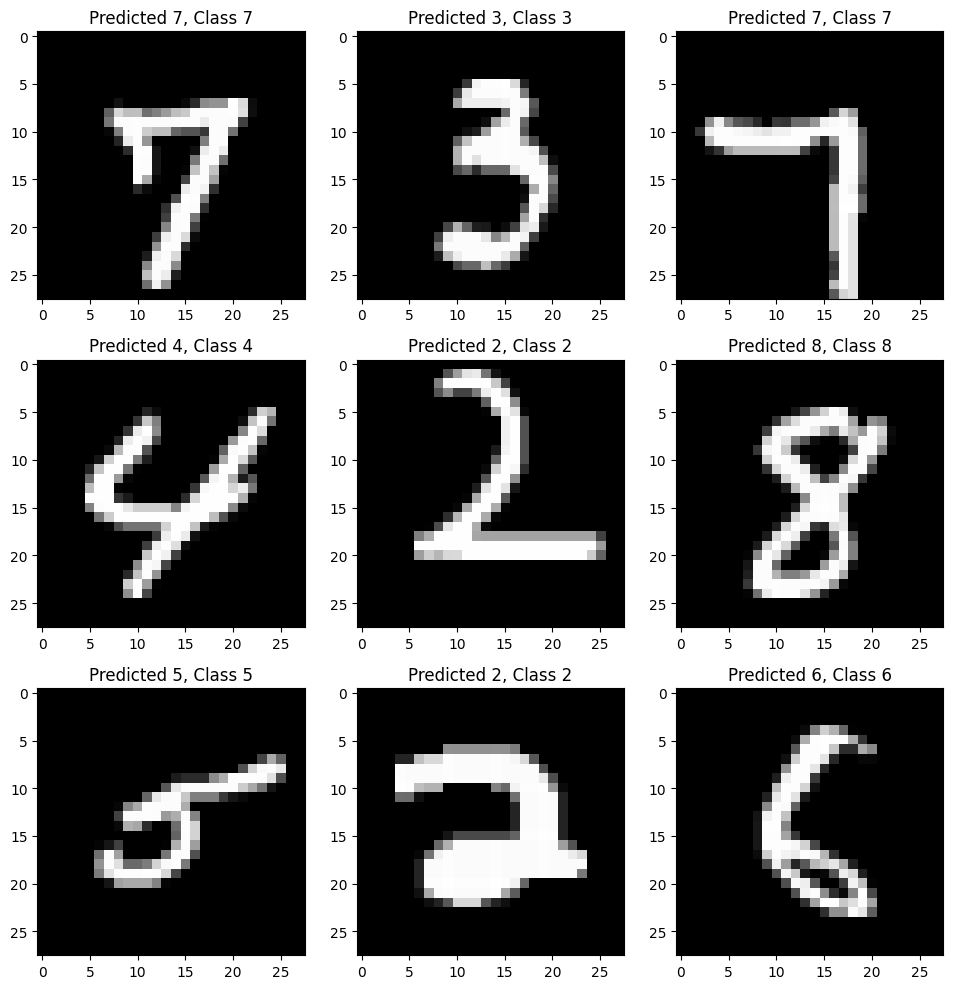

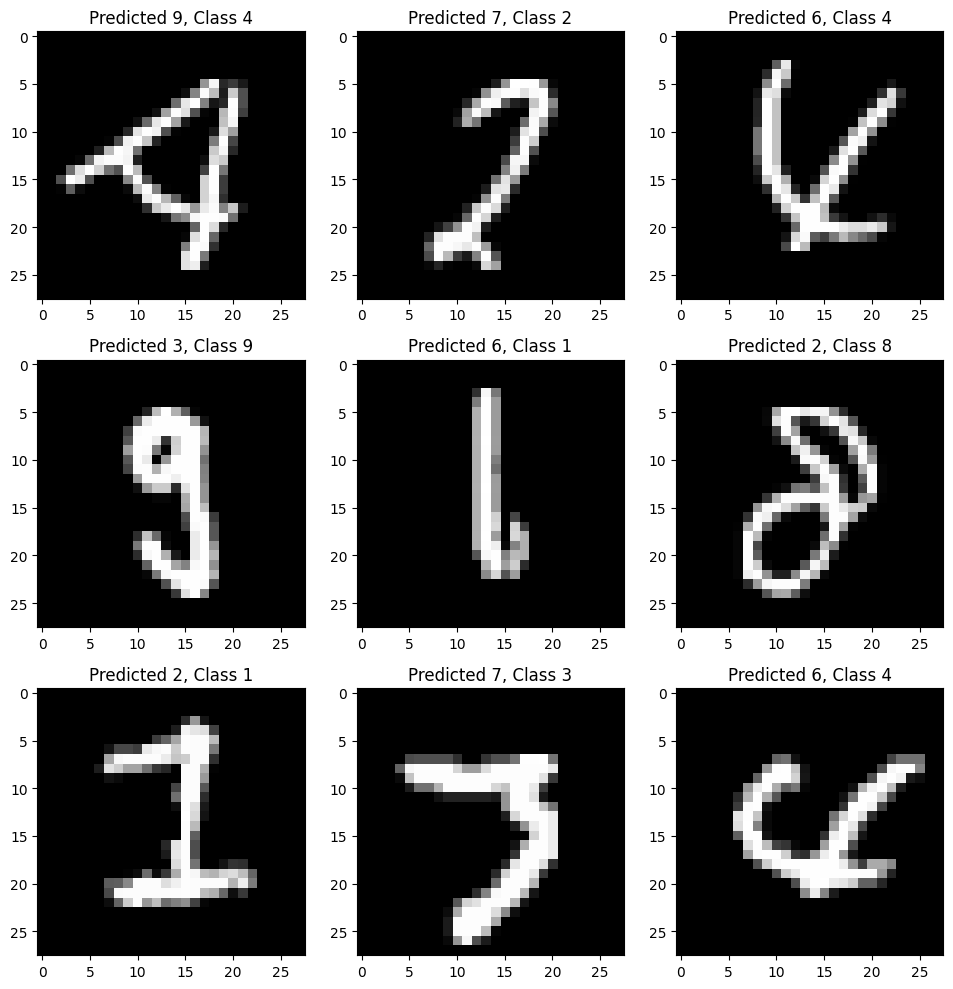

In [15]:
def display_prediction_examples(x_test, y_true, y_pred):
    correct = np.where(y_true == y_pred)[0]
    incorrect = np.where(y_true != y_pred)[0]

    # Display correct predictions
    plt.figure(figsize=(10, 10))
    for i, correct_index in enumerate(correct[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[correct_index].reshape(28,28), cmap='gray', interpolation='none')
        plt.title(f"Predicted {y_pred[correct_index]}, Class {y_true[correct_index]}")
        plt.tight_layout()

    # Display incorrect predictions
    plt.figure(figsize=(10, 10))
    for i, incorrect_index in enumerate(incorrect[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[incorrect_index].reshape(28,28), cmap='gray', interpolation='none')
        plt.title(f"Predicted {y_pred[incorrect_index]}, Class {y_true[incorrect_index]}")
        plt.tight_layout()

    plt.show()


display_prediction_examples(x_test, y_test_int_labels, test_predictions)

## Predict the new Test Digits

**Import Test Set**

In [16]:
test = pd.read_csv('test/test.csv').astype('float32')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print('The Test Set is composed by', test.shape[0], 'grey-scale images of numbers from 0 to 9')
print('Each image is 28x28 pixels')

The Test Set is composed by 28000 grey-scale images of numbers from 0 to 9
Each image is 28x28 pixels


**Reshape the Test Set**

In [18]:
# Reshape the Pixels Data
test = np.reshape(test.values, (test.shape[0], 28, 28, 1))

**Prediction**

In [19]:
predictions = model.predict(test)

875/875 [==============================] - 4s 5ms/step


**Plot some predictions**

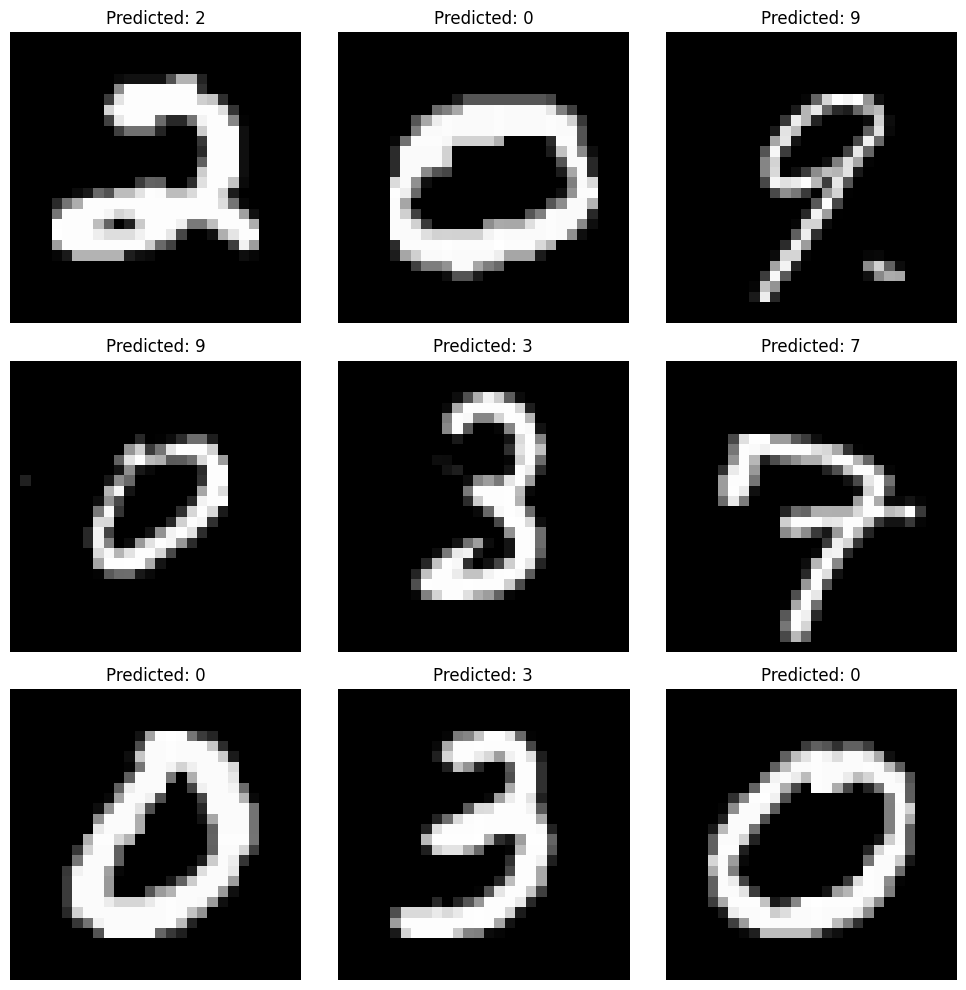

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Convert test to a numpy array if it's a pandas data structure
test_array = test.to_numpy() if isinstance(test, pd.DataFrame) or isinstance(test, pd.Series) else test

for i in range(9):
    # Get the predicted label with the highest probability
    predicted_label = np.argmax(predictions[i])
    
    # Use test_array for compatibility with direct indexing
    axes[i].imshow(test_array[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Predicted: {}'.format(predicted_label))

plt.tight_layout()
plt.show()

**Submission (optional)**

In [21]:
# result = np.argmax(predictions,axis=1)
# result = pd.Series(result,name='Label')
# submission = pd.concat([pd.Series(range(1,28001),name='ImageId'),result],axis=1)
# submission.to_csv('submission.csv',index=False)